# Gradient-Based Model Fitting:
Fitting linear and non-linear regression models with heteroscedastic noise using neural networks

## Manually Derived Linear Regression

First, we will experiment with traditional linear regression using maximum likelihood estimate.

Suppose that $X \in \mathbb{R}^{m \times n}$ with $n \geq m$
and $Y \in \mathbb{R}^n$, and that $Y \sim \mathcal{N}(X^T\beta, \sigma^2 I)$.

We will derive the result that the maximum likelihood estimate $\hat\beta$ of $\beta$ is given by
$$
\hat\beta = (XX^T)^{-1}XY
$$

However, note that if $n < m$:

This means that when we solve for $\hat\beta$, we will have infinitely many solutions
(leading to an infinitely large variance for our estimate),
so there will no longer be a unique least squares estimate.
In the machine learning perspective, this means we have the number of variables/features less than our number of observations
or collected data.

### Deriving Expectation and covariance matrix of $\hat\beta$, for a given true value of $\beta$

\begin{align*}
E[\hat\beta] &= E[(XX^T)^{-1}XY]\\
&= (XX^T)^{-1}X E[Y]       \\
&= (XX^T)^{-1}X X^T\beta   \\
&= \beta\\
\end{align*}

\begin{align*}
Var[\hat \beta] &= Var[(XX^T)^{-1}XY] \\
&= (XX^T)^{-1}X Var[Y] ((XX^T)^{-1}X)^T \\
&= (XX^T)^{-1}X \sigma^2 I ((XX^T)^{-1}X)^T \\
&= \sigma^2 (XX^T)^{-1}X X^T ((XX^T)^{-1})^T \\
&= \sigma^2 ((XX^T)^{-1})^T  \\
\end{align*}

### Show that maximizing the likelihood is equivalent to minimizing the squared error

Now, we will show that maximizing the likelihood is equivalent to minimizing the squared error $\sum_{i=1}^n (y_i - x_i\beta)^2$ , where $\sum_{i=1}^n a_i^2 = a^Ta$

\begin{align*}
L(\beta) &= f(Y| X, \beta, \sigma^2I) \\
&= \prod_{i=1}^{N}\frac{1}{det(2\pi \Sigma)^{\frac{1}{2}}}exp(-\frac{1}{2}(y_i - \mu_i)^T\Sigma^{-1}(y_i - \mu_i)) \\
&= \prod_{i=1}^{N}\frac{1}{det(2\pi\sigma^2I)^{\frac{1}{2}}}exp(-\frac{1}{2}(y_i - x_i \beta)^T (\sigma^2 I )^{-1} (y_i - x_i \beta)) \\
&= \prod_{i=1}^{N}\frac{1}{det(2\pi\sigma^2I)^{\frac{1}{2}}}exp(-\frac{1}{2}(\sigma^{-2}I) (y_i - x_i \beta)^T (y_i - x_i \beta)) \\
&= \frac{1}{det(2\pi\sigma^2 I)^{\frac{n}{2}}}exp( -\frac{1}{2}(\sigma^{-2}I)\sum_{i=1}^{n}(y_i - x_i \beta)^T (y_i - x_i \beta)) \\
&= \frac{1}{det(2\pi\sigma^2 I)^{\frac{n}{2}}}exp( -\frac{1}{2}(\sigma^{-2}I)(Y-X^T\beta)^T (Y-X^T\beta)) \\
\end{align*}

Our goal is to find an estimator $\hat{\beta}$ that maximizes the likelihood of $L(\beta)$ given by the equation above.
Notice that in order to do that we need to minimize the exponential term (since it has a negative weight) and the only variable we can control for is $\beta$.
So ultimately, we need to minimze $(Y-X^T\beta)^T (Y-X^T\beta)$ or $(y_i - x_i \beta)^T (y_i - x_i \beta)$, which according to the hint, is the squared error of $\sum_{i=1}^n (y_i - x_i \beta)^2$.
Hence, maximizing the likelihood is equivalent to minimizing the squared error.

### Showing the squared error in vector notation

Now, we will write the squared error in vector notation, expand the expression, and collect like terms. 

First, we know that $\beta^Tx^Ty = y^Tx\beta$ and $x^Tx$ is symmetric, so $\beta^T X y = y^T X^T \beta$.
Hence,

\begin{align*}
\sum_{i=1}^{N}(y_i - x_i \beta)^2 &= (Y-X^T\beta)^T(Y-X^T\beta) \\
&= Y^T Y - Y^T X^T\beta - \beta^T X Y + \beta^T X X^T\beta \\
&= Y^T Y - 2\beta^TXY + \beta^T X X^T\beta \\
\end{align*}

Now, we will use the likelihood expression to write the derivative of the negative log-likelihood with respect to $\beta$, set equal to zero, and solve to show the maximum likelihood estimate $\hat\beta$ as above.

$$
\begin{align*}
L(\beta) &= \frac{1}{det(2\pi\sigma^2 I)^{\frac{n}{2}}}exp( -\frac{1}{2}(\sigma^{-2}I)(y-X^T\beta)^T (y-X^T\beta)) \\
l(\beta) &= \ln(L(\beta)) \\
&= -\frac{1}{2\sigma^2I}(y-X^T\beta)^T (y-X^T\beta) + \ln(\frac{1}{det(2\pi\sigma^2 I)^{\frac{n}{2}}}) \\
\frac{\partial l(\beta)}{\partial \beta} &= \frac{1}{\sigma^2I}(y-X^T\beta)^T X^T \\
\end{align*}
$$

Finally, we will set the derivative of $l(\beta)$ to 0, and solve for $\beta$, ignoring constant terms (w.r.t to $\beta$) in the process.
$$
\begin{align*}
y^TX^T - \beta^TXX^T &= 0\\
\beta^TXX^T &= y^TX^T\\
\beta^T &= (y^TX^T)(XX^T)^{-1}\\
\beta &= ((y^TX^T)(XX^T)^{-1})^T\\
\beta &= (XX^T)^{-1}XY \\
\hat{\beta} &= (XX^T)^{-1}XY\\
\end{align*}
$$

## Experimenting with toy data

For visualization purposes and to minimize computational resources we will work with 1-dimensional toy data: $X \in \mathbb{R}^{m \times n}$ where $m=1$.

We will learn models for 3 target functions

* `target_f1`, linear trend with constant noise.
* `target_f2`, linear trend with heteroskedastic noise.
* `target_f3`, non-linear trend with heteroskedastic noise.

In [5]:
using LinearAlgebra

function target_f1(x, σ_true=0.3)
  noise = randn(size(x))
  y = 2x .+ σ_true.*noise
  return vec(y)
end

function target_f2(x)
  noise = randn(size(x))
  y = 2x + norm.(x)*0.3.*noise
  return vec(y)
end

function target_f3(x)
  noise = randn(size(x))
  y = 2x + 5sin.(0.5*x) + norm.(x)*0.3.*noise
  return vec(y)
end

target_f3 (generic function with 1 method)

Implement a function which produces a batch of data $x \sim \text{Uniform}(0,20)$ and `y = target_f(x)`

In [6]:
using Distributions

function sample_batch(target_f, batch_size)
  x = transpose(rand(Uniform(0, 20), batch_size))
  y = target_f(x)
  return (x,y)
end

sample_batch (generic function with 1 method)

Testing sample dimensions for `sample_batch` function.

In [7]:
using Test
@testset "sample dimensions are correct" begin
  m = 1 # dimensionality
  n = 200 # batch-size
  for target_f in (target_f1, target_f2, target_f3)
    x,y = sample_batch(target_f,n)
    @test size(x) == (m,n)
    @test size(y) == (n,)
  end
end

Test Summary:                 | Pass  Total
sample dimensions are correct |    6      6


Test.DefaultTestSet("sample dimensions are correct", Any[], 6, false)

For all three targets, plot a $n=1000$ sample of the data.

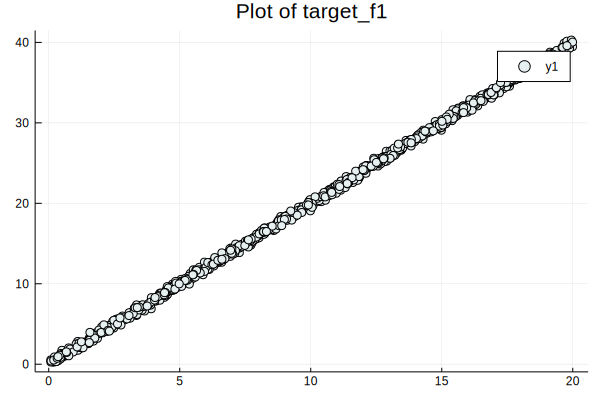

In [8]:
using Plots
# plot()
x1,y1 = sample_batch(target_f1, 1000)
plot_f1 = plot(vec(x1),y1,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f1")

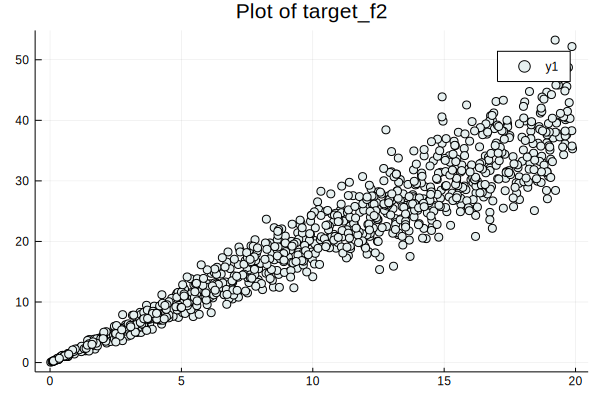

In [9]:
x2,y2 = sample_batch(target_f2, 1000)
plot_f2 = plot(vec(x2),y2,seriestype=:scatter, seriescolor=ColorGradient(:dense),title = "Plot of target_f2")

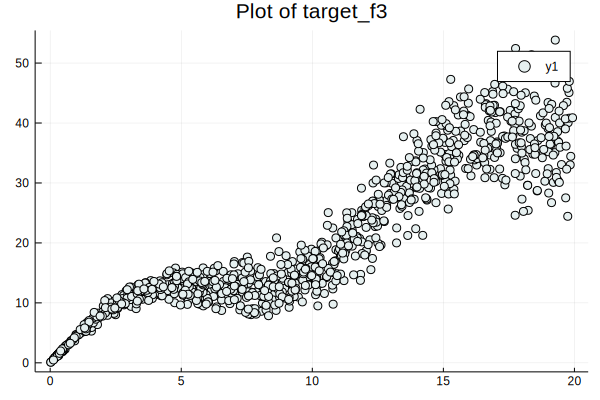

In [10]:
x3,y3 = sample_batch(target_f3, 1000)
plot_f3 = plot(vec(x3),y3,seriestype=:scatter, seriescolor=ColorGradient(:dense),title = "Plot of target_f3")

## Linear Regression Model with $\hat \beta$ MLE

Implement the function that computes the the maximum likelihood estimate given $X$ and $Y$ and use it to compute the estimate $\hat \beta$ for a $n=1000$ sample from each target function.

In [11]:
function beta_mle(X,Y)
  beta = inv((X*transpose(X)))*X*Y
  return beta
end

n=1000 # batch_size

x_1, y_1 = sample_batch(target_f1, 1000)
β_mle_1 = beta_mle(x_1, y_1)

x_2, y_2 = sample_batch(target_f2, 1000)
β_mle_2 = beta_mle(x_2, y_2)

x_3, y_3 = sample_batch(target_f3, 1000)
β_mle_3 = beta_mle(x_3, y_3)


2.0472121846885742

For each function, plot the linear regression model given by $Y \sim \mathcal{N}(X^T\hat\beta, \sigma^2 I)$ for $\sigma=1.$.
The plots will have the line of best fit given by the maximum likelihood estimate, as well as a shaded region around the line corresponding to plus/minus one standard deviation (i.e. the fixed uncertainty $\sigma=1.0$), i.e., for each target function, the plots will show samples of data and maximum likelihood estimate linear regression model

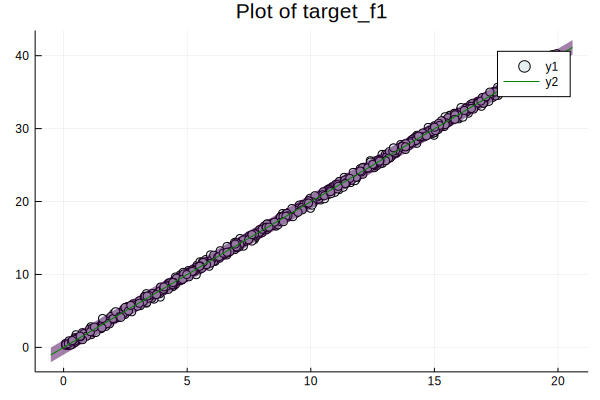

In [12]:
plot(plot_f1)
display(plot!(x_1 -> transpose(x_1).*β_mle_1, color=ColorGradient(:viridis),linecolor="green", ribbon=1.))

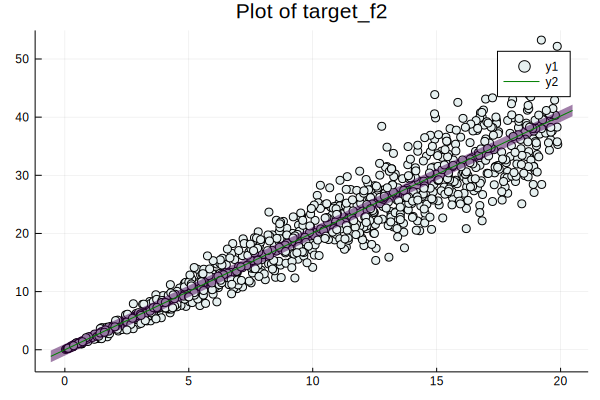

In [13]:
plot(plot_f2)
display(plot!(x_2 -> transpose(x_2).*β_mle_2, color=ColorGradient(:viridis),linecolor="green", ribbon=1.))

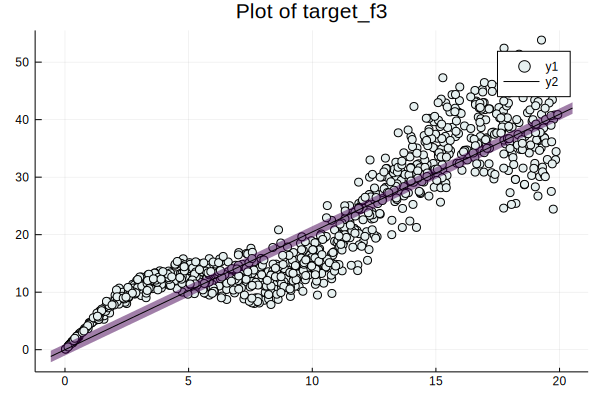

In [14]:
plot(plot_f3)
display(plot!(x_3 -> transpose(x_3).*β_mle_3, color=ColorGradient(:viridis),linecolor="black", ribbon=1.))

## Log-likelihood of Data Under Model

Implement the function that computes the likelihood of $x$ under the Gaussian distribution $\mathcal{N}(μ,σ)$. This function will be able to broadcast to the case where $x, \mu, \sigma$ are all vector valued and return a vector of likelihoods with equivalent length, i.e., $x_i \sim \mathcal{N}(\mu_i,\sigma_i)$.

In [27]:
function gaussian_log_likelihood(μ, σ, x)
  """
  compute log-likelihood of x under N(μ,σ)
  """
  N = length(x)
  Log_Likelihood = -N/2 * log(2*pi) - N/2 *log((σ^2)) - (1/(2*σ^2))* (transpose(x - μ)* (x - μ))
  return Log_Likelihood
end

gaussian_log_likelihood (generic function with 1 method)

In [48]:
# Test Gaussian likelihood against standard implementation
@testset "Gaussian log likelihood" begin
  using Distributions: pdf, Normal
  # Scalar mean and variance
  x = randn()
  μ = randn()
  σ = rand()
  @test size(gaussian_log_likelihood(μ,σ,x)) == () # Scalar log-likelihood
  @test gaussian_log_likelihood.(μ,σ,x) ≈ log.(pdf.(Normal(μ,σ),x)) # Correct Value
  # Vector valued x under constant mean and variance
  x = randn(100)
  μ = randn()
  σ = rand()
  @test size(gaussian_log_likelihood.(μ,σ,x)) == (100,) # Vector of log-likelihoods
  # Vector valued x under vector valued mean and variance
  x = randn(10)
  μ = randn(10)
  σ = rand(10)
  @test size(gaussian_log_likelihood.(μ,σ,x)) == (10,) # Vector of log-likelihoods
  @test isapprox(gaussian_log_likelihood.(μ,σ,x),log.(pdf.(Normal.(μ,σ),x))) # Correct Values
end

Test Summary:           | Pass  Total
Gaussian log likelihood |    5      5


Test.DefaultTestSet("Gaussian log likelihood", Any[], 5, false)

Use the gaussian log-likelihood function to compute the negative log-likelihood of the target value $Y$ under the model $Y \sim \mathcal{N}(X^T\beta, \sigma^2*I)$ for
    a given value of $\beta$.


In [49]:
function lr_model_nll(β,x,y;σ=1.)
  # print(gaussian_log_likelihood(transpose(x)*β, σ, y))
  return -1*sum(gaussian_log_likelihood.(transpose(x)*β, σ, y))
end

lr_model_nll (generic function with 1 method)

Use this function to compute and report the negative-log-likelihood of a $n\in \{10,100,1000\}$ batch of data
    under the model with the maximum-likelihood estimate $\hat\beta$ and $\sigma \in \{0.1,0.3,1.,2.\}$ for each target function.

In [50]:
for n in (10,100,1000)
    println("--------  $n  ------------")
    for target_f in (target_f1,target_f2, target_f3)
      println("--------  $target_f  ------------")
      for σ_model in (0.1,0.3,1.,2.)
        println("--------  $σ_model  ------------")
        x,y = sample_batch(target_f, n)
        β_mle = beta_mle(x, y)
        nll = lr_model_nll(β_mle,x,y;σ=σ_model)
        println("Negative Log-Likelihood: $nll")
      end
    end
end

--------  10  ------------
--------  target_f1  ------------
--------  0.1  ------------
Negative Log-Likelihood: 3.290273661362181
--------  0.3  ------------
Negative Log-Likelihood: 1.698276426400502
--------  1.0  ------------
Negative Log-Likelihood: 9.533251983861565
--------  2.0  ------------
Negative Log-Likelihood: 16.282327910522874
--------  target_f2  ------------
--------  0.1  ------------
Negative Log-Likelihood: 3317.8867562124956
--------  0.3  ------------
Negative Log-Likelihood: 866.6914796252879
--------  1.0  ------------
Negative Log-Likelihood: 46.70386886088862
--------  2.0  ------------
Negative Log-Likelihood: 26.63681437688879
--------  target_f3  ------------
--------  0.1  ------------
Negative Log-Likelihood: 2051.8296302453546
--------  0.3  ------------
Negative Log-Likelihood: 1190.712763341246
--------  1.0  ------------
Negative Log-Likelihood: 129.4740892463066
--------  2.0  ------------
Negative Log-Likelihood: 24.53491304410249
--------  100  -

According to my initialization of x, y from the sample batch (at the time when I run the program),
the best $\sigma$ when $n=10$ for target_f1 is 0.3, target_f2 is 2.0, and target_f3 is 2.0.
When $n=100$, the best $\sigma$ for target_f1 is 0.3, target_f2 is 1.0, and target_f3 is 2.0.
When $n=1000$, the best $\sigma$ for target_f1 is 0.3, target_f2 is 2.0, and target_f3 is 0.1.

Note that $\sigma$ and batch-size $n$ are modelling hyperparameters.
In the expression of maximum likelihood estimate, $\sigma$ or $n$ do not appear, and in principle shouldn't affect the final answer.
However, in practice these can have significant effect on the numerical stability of the model.
Too small values of $\sigma$ will make data away from the mean very unlikely, which can cause issues with precision.
Also, the negative log-likelihood objective involves a sum over the log-likelihoods of each datapoint. This means that with a larger batch-size $n$, there are more datapoints to sum over, so a larger negative log-likelihood is not necessarily worse.
Hence, we cannot directly compare the negative log-likelihoods achieved by these models with different hyperparameter settings.

## Automatic Differentiation and Maximizing Likelihood

We will now the expression for the derivative of the negative log-likelihood with respect to $\beta$ above to test the gradients produced by automatic differentiation.


For a random value of $\beta$, $\sigma$, and $n=100$ sample from a target function,
    use automatic differentiation to compute the derivative of the negative log-likelihood of the sampled data
    with respect $\beta$ and test that this is equivalent to the hand-derived value.

In [52]:
using Zygote: gradient
@testset "Gradients wrt parameter" begin
  β_test = randn()
  σ_test = rand()
  x,y = sample_batch(target_f1,100)
  # ad_grad =  gradient(β -> ((-1/(2*σ_test^2))*transpose(y-transpose(x)*β)*(y-transpose(x)*β))+log(1/((2*pi*(σ_test^2))^(N/2))), β_test)
  ad_grad = gradient(β -> gaussian_log_likelihood(transpose(x)*β, σ_test, y),β_test)
  hand_derivative = (1/(σ_test^2))*transpose(y - transpose(x)*β_test)*transpose(x)
  @test ad_grad[1] ≈ hand_derivative#########
end

Test Summary:           | Pass  Total
Gradients wrt parameter |    1      1


Test.DefaultTestSet("Gradients wrt parameter", Any[], 1, false)

### Train Linear Regression Model with Gradient Descent

We will now compute gradients of of negative log-likelihood with respect to $\beta$ and use gradient descent to find $\beta$ that maximizes the likelihood.

Implement a function `train_lin_reg` that accepts a target function and an initial estimate for $\beta$ and some
    hyperparameters for batch-size, model variance, learning rate, and number of iterations.
    Then, for each iteration:
* sample data from the target function
* compute gradients of negative log-likelihood with respect to $\beta$
* update the estimate of $\beta$ with gradient descent with specified learning rate

and, after all iterations, returns the final estimate of $\beta$.

In [75]:
using Logging # Print training progress

function train_lin_reg(target_f, β_init; bs= 100, lr = 1e-6, iters=1000, σ_model = 1. )
    β_curr = β_init
    for i in 1:iters
      x,y = sample_batch(target_f,bs)
      loss = lr_model_nll(β_curr, x, y;σ=σ_model)
      if (i%100==0) || i ==1 #just log every 100 iterations
          @info "loss: $loss  β: $β_curr"
      end
      grad_β = gradient(β -> lr_model_nll(β,x,y,σ=σ_model), β_curr)#TODO: compute gradients
      β_curr = β_curr - lr * grad_β[1]
    end
    return β_curr
end

train_lin_reg (generic function with 1 method)

For each target function, start with an initial parameter $\beta$, learn an estimate for $\beta_\text{learned}$ by gradient descent.
Then plot a $n=1000$ sample of the data and the learned linear regression model with shaded region for uncertainty corresponding to plus/minus one standard deviation.

In [73]:
target_f = target_f1
β_init = 1000*randn() # Initial parameter
β_learned= train_lin_reg(target_f, β_init; bs= 100, lr = 1e-6, iters=1000, σ_model = 1. )
x,y = sample_batch(target_f,1000)

┌ Info: loss: 5.552657775262645e9  β: 911.6544032231233
└ @ Main In[72]:9
┌ Info: loss: 3.7877288023692995e8  β: 240.29895443946174
└ @ Main In[72]:9
┌ Info: loss: 2.5935793257343058e7  β: 65.442779022015
└ @ Main In[72]:9
┌ Info: loss: 1.8069451534274544e6  β: 18.447334125902472
└ @ Main In[72]:9
┌ Info: loss: 126478.70972350286  β: 6.310896439194956
└ @ Main In[72]:9
┌ Info: loss: 8924.98288700321  β: 3.1648900653379064
└ @ Main In[72]:9
┌ Info: loss: 749.9672420842159  β: 2.3025911139037296
└ @ Main In[72]:9
┌ Info: loss: 139.10325600071909  β: 2.0792756271169415
└ @ Main In[72]:9
┌ Info: loss: 99.60561527263384  β: 2.02078266913849
└ @ Main In[72]:9
┌ Info: loss: 96.18301048385396  β: 2.0058550120559966
└ @ Main In[72]:9
┌ Info: loss: 96.30138615661711  β: 2.0015040772187027
└ @ Main In[72]:9


([19.03097706365781 16.888478624300998 … 18.09522192949828 14.730831727556533], [38.02206125438841, 33.715052697638164, 39.860672526462864, 15.47397202079719, 28.6090472691636, 36.484655516545914, 38.38055188452013, 25.504053803562982, 5.621013531189813, 12.03646134591727  …  17.059186457503095, 38.132979129549895, 16.97477431172469, 37.82115188222913, 15.779232528811232, 4.469678298098712, 28.956574755452102, 7.321532185451371, 36.14327058584364, 29.851225019517674])

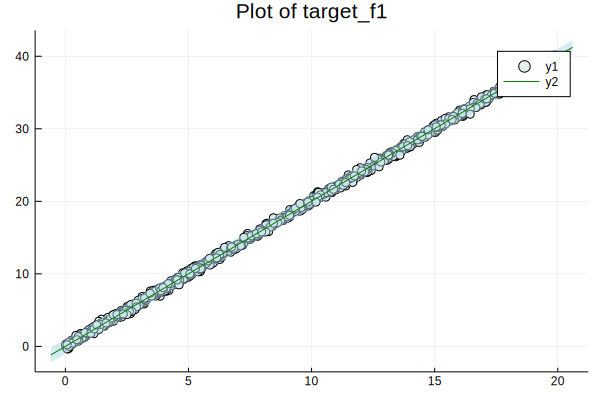

In [74]:
plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f1")
display(plot!(x -> transpose(x).*β_learned, color=ColorGradient(:blues),linecolor="green", ribbon=1.))

In [76]:
target_f = target_f2
β_init = 1000*randn() # Initial parameter
β_learned= train_lin_reg(target_f, β_init; bs= 100, lr = 1e-6, iters=1000, σ_model = 1. )
x,y = sample_batch(target_f,1000)

┌ Info: loss: 1.7031836459037158e9  β: -504.4399485151782
└ @ Main In[75]:9
┌ Info: loss: 1.1205144976932155e8  β: -130.71923898089844
└ @ Main In[75]:9
┌ Info: loss: 9.206553200488273e6  β: -32.6883082028909
└ @ Main In[75]:9
┌ Info: loss: 518716.55385109404  β: -6.992222298596499
└ @ Main In[75]:9
┌ Info: loss: 31829.199683811727  β: -0.33642133160699017
└ @ Main In[75]:9
┌ Info: loss: 3754.4780379323383  β: 1.390928409261105
└ @ Main In[75]:9
┌ Info: loss: 749.9852626691392  β: 1.8432686910438207
└ @ Main In[75]:9
┌ Info: loss: 699.914663005471  β: 1.9607415408471542
└ @ Main In[75]:9
┌ Info: loss: 733.2214417837943  β: 1.989795420877855
└ @ Main In[75]:9
┌ Info: loss: 566.2317868956409  β: 1.9941140515233315
└ @ Main In[75]:9
┌ Info: loss: 692.0831271783878  β: 1.9998449171426875
└ @ Main In[75]:9


([3.607238893903437 16.209817275314858 … 12.048392631290103 8.073544599811102], [8.50334852415755, 40.3392343463277, 11.054140847044783, 9.149723887617519, 5.461049900016292, 32.70714704629296, 24.352323762022557, 19.234541873815115, 8.391123967897842, 11.495965965893815  …  0.9975746924088114, 10.141292620110136, 20.880097765123175, 34.84968438836965, 0.43845272699076154, 27.082329495804316, 7.512441038081836, 15.7995854786977, 27.273573571127372, 15.892680579965903])

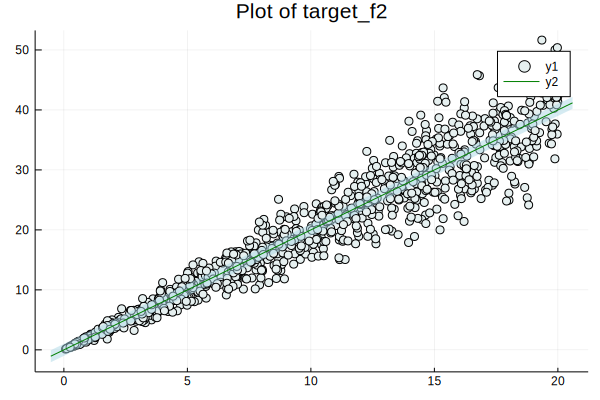

In [77]:
plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f2")
display(plot!(x -> transpose(x).*β_learned, color=ColorGradient(:blues),linecolor="green", ribbon=1.))

In [78]:
target_f = target_f3
β_init = 1000*randn() # Initial parameter
β_learned= train_lin_reg(target_f, β_init; bs= 100, lr = 1e-6, iters=1000, σ_model = 1. )
x,y = sample_batch(target_f,1000)

┌ Info: loss: 3.918930612645904e9  β: -734.6626662929219
└ @ Main In[75]:9
┌ Info: loss: 2.5963026278735846e8  β: -195.11637341611993
└ @ Main In[75]:9
┌ Info: loss: 1.5201959873144252e7  β: -49.374538955610305
└ @ Main In[75]:9
┌ Info: loss: 1.1862897061861285e6  β: -11.354620826249802
└ @ Main In[75]:9
┌ Info: loss: 87212.61507008414  β: -1.502918714604781
└ @ Main In[75]:9
┌ Info: loss: 6652.43065484788  β: 1.1420897290194911
└ @ Main In[75]:9
┌ Info: loss: 1837.406017026203  β: 1.8128199782531305
└ @ Main In[75]:9
┌ Info: loss: 1268.5838687667667  β: 1.9913494227760886
└ @ Main In[75]:9
┌ Info: loss: 1126.3163788406757  β: 2.0414978804811943
└ @ Main In[75]:9
┌ Info: loss: 1253.1405222993258  β: 2.0505953756277857
└ @ Main In[75]:9
┌ Info: loss: 1076.8056868483975  β: 2.0579536817164255
└ @ Main In[75]:9


([14.271462603297241 19.20136949383248 … 8.429626308714138 10.847975708770559], [32.106343761069354, 45.128045789022366, 21.96355733306251, 32.94206797736174, 7.77239225066812, 8.203283287458966, 19.396047564007432, 12.646660644151122, 13.08223082813157, 19.122630478199795  …  30.71337661236518, 14.468503155623292, 8.92853161814552, 37.4949733474318, 34.517094957656205, 29.025576359779926, 12.369813113258754, 20.863234704673545, 10.48425800992956, 16.10539552874601])

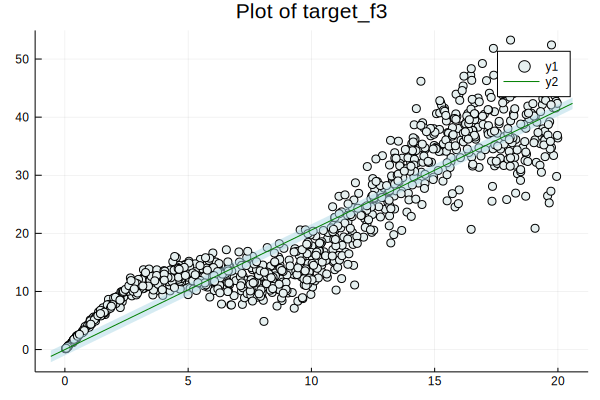

In [79]:
plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f3")
display(plot!(x -> transpose(x).*β_learned, color=ColorGradient(:blues),linecolor="green", ribbon=1.))

## Non-linear Regression with a Neural Network 

In the previous parts we have considered a linear regression model

$$Y \sim \mathcal{N}(X^T \beta, \sigma^2)$$

This model specified the mean of the predictive distribution for each datapoint by the product of that datapoint with our parameter.

Now, let us generalize this to consider a model where the mean of the predictive distribution is a non-linear function of each datapoint.
We will have our non-linear model be a simple function called `neural_net` with parameters $\theta$
(collection of weights and biases).

$$Y \sim \mathcal{N}(\text{neural_net}(X,\theta), \sigma^2)$$

Implement a fully-connected neural network (multi-layer perceptron) with one 10-dimensional hidden layer and a `tanh` nonlinearirty.
This network will output the mean vector, test that it outputs the correct shape for some random parameters.

In [80]:
# Neural Network Function
# n = 100
function neural_net(x,θ)
  input = x
  hidden = tanh.(transpose(input)*θ[2] .+ θ[1]) #1x10
  output =  hidden*θ[3] .+ θ[4]
  return vec(output)
end

# Random initial Parameters
#x = 1x100
# b1 = rand(100, 10) #θ[1]
# w1 = rand(1, 10) #θ[2]
# w2 = rand(10,1) #θ[3]
# b2 = rand(100, 1) #θ[4]

w1 = rand(1,10)
w2 = rand(10,1)
b1 = rand(1,10)
b2 = rand(1,1)
θ = (b1, w1, w2, b2)

([0.7169511968424305 0.02335915125461363 … 0.5521688183855085 0.7043761639533583], [0.7465758912758065 0.37489258248664536 … 0.2458547705018983 0.625535698817995], [0.407120573352757; 0.19491211890577365; … ; 0.1149595099942704; 0.1813779113215641], [0.5266842448070166])

In [81]:
@testset "neural net mean vector output" begin
  n = 100
  x,y = sample_batch(target_f1,n)
  μ = neural_net(x,θ)
  @test size(μ) == (n,)
end

Test Summary:                 | Pass  Total
neural net mean vector output |    1      1


Test.DefaultTestSet("neural net mean vector output", Any[], 1, false)

Compute the negative log-likelihood for this model where the mean is given by the output of the neural network and $\sigma = 1.0$

In [82]:
function nn_model_nll(θ,x,y;σ=1)
  N = length(x)
  return -1*sum(gaussian_log_likelihood.(neural_net(x,θ), σ, y))
end

nn_model_nll (generic function with 1 method)

Impelement the function `train_nn_reg` that accepts a target function and an initial estimate for $\theta$ and some
    hyperparameters for batch-size, model variance, learning rate, and number of iterations.
    Then, for each iteration:
* sample data from the target function
* compute gradients of negative log-likelihood with respect to $\theta$
* update the estimate of $\theta$ with gradient descent with specified learning rate

and, after all iterations, returns the final estimate of $\theta$.


In [104]:
function train_nn_reg(target_f, θ_init; bs= 100, lr = 1e-5, iters=1000, σ_model = 1. )
    θ_curr = θ_init
    for i in 1:iters
      x,y = sample_batch(target_f,bs)
      loss = nn_model_nll(θ_curr, x, y,σ=σ_model)
      if (i==1) || (i % (iters/10)==0) #just print every iters/10 iterations
          @info "iteration $i, loss: $loss" #log loss
        end
      grad_θ = gradient(θ ->  nn_model_nll(θ, x, y;σ=σ_model), θ_curr)# compute gradients
      new_theta1 =  θ_curr[1] - lr * grad_θ[1][1]
      new_theta2 =  θ_curr[2] - lr * grad_θ[1][2]
      new_theta3 =  θ_curr[3] - lr * grad_θ[1][3]
      new_theta4 =  θ_curr[4] - lr * grad_θ[1][4]
      θ_curr = (new_theta1, new_theta2, new_theta3, new_theta4)
    end
    return θ_curr
end

train_nn_reg (generic function with 1 method)

For each target function, start with an initialization of the network parameters, $\theta$, use the train function to minimize the negative log-likelihood and find an estimate for $\theta_\text{learned}$ by gradient descent.
Then plot a $n=1000$ sample of the data and the learned regression model with shaded uncertainty bounds given by $\sigma = 1.0$

In [105]:
target_f = target_f1
# n = 100
w1 = 0.01*rand(1,10)
w2 = 0.01*rand(10,1)
b1 = 0.01*rand(1,10)
b2 = 0.01*rand(1,1)
θ_init = (b1, w1, w2, b2)
θ_learned= train_nn_reg(target_f, θ_init; bs= 200, lr = 1e-5, iters=3000, σ_model = 1. )
x,y = sample_batch(target_f,1000)
target = plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f1")
# plot!(x, θ_learned[4], color=ColorGradient(:viridis),linecolor="green", ribbon=1.)
r = 0:0.01:20
r_array = r[:,:]
f(x) = neural_net(x, θ_learned)
y = f(transpose(r_array))

┌ Info: iteration 1, loss: 57047.69419276071
└ @ Main In[104]:7
┌ Info: iteration 300, loss: 1817.6707372405308
└ @ Main In[104]:7
┌ Info: iteration 600, loss: 3002.761373436514
└ @ Main In[104]:7
┌ Info: iteration 900, loss: 2111.150569889686
└ @ Main In[104]:7
┌ Info: iteration 1200, loss: 1889.5436581220486
└ @ Main In[104]:7
┌ Info: iteration 1500, loss: 1693.728353062819
└ @ Main In[104]:7
┌ Info: iteration 1800, loss: 2851.7186878504326
└ @ Main In[104]:7
┌ Info: iteration 2100, loss: 1857.7290603088093
└ @ Main In[104]:7
┌ Info: iteration 2400, loss: 753.2323352884431
└ @ Main In[104]:7
┌ Info: iteration 2700, loss: 519.6614647283415
└ @ Main In[104]:7
┌ Info: iteration 3000, loss: 509.9705848885807
└ @ Main In[104]:7


2001-element Array{Float64,1}:
 -2.189167367715208 
 -2.127096650403849 
 -2.065427040071037 
 -2.0041595181050207
 -1.9432949423784747
 -1.8828340488040896
 -1.8227774529471708
 -1.7631256516923317
 -1.7038790249614708
 -1.6450378374801975
 -1.5866022405898494
 -1.5285722741023209
 -1.470947868194881 
  ⋮                 
 33.67855011761491  
 33.683011474485234 
 33.68745562833397  
 33.69188263304429  
 33.696292542428054 
 33.7006854102252   
 33.705061290103    
 33.70942023565544  
 33.71376230040255  
 33.718087537789735 
 33.72239600118713  
 33.726687743888945 

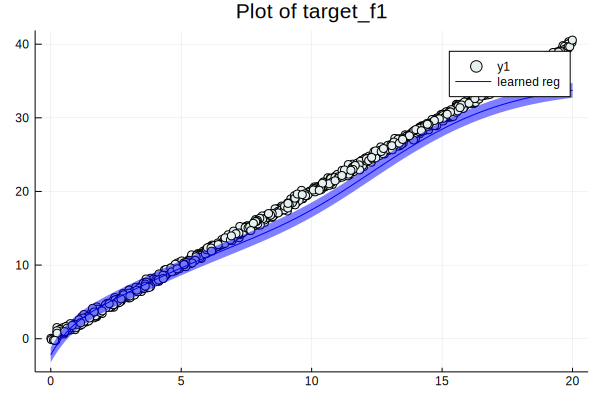

In [106]:
display(plot!(target, r, y, color="blue", label="learned reg", ribbon = 1))

In [107]:
target_f = target_f2
# n = 100
w1 = 0.01*rand(1,10)
w2 = 0.01*rand(10,1)
b1 = 0.01*rand(1,10)
b2 = 0.01*rand(1,1)
θ_init = (b1, w1, w2, b2)
θ_learned= train_nn_reg(target_f, θ_init; bs= 200, lr = 1e-5, iters=5000, σ_model = 1. )
x,y = sample_batch(target_f,1000)
target = plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f2")
# plot!(x, θ_learned[4], color=ColorGradient(:viridis),linecolor="green", ribbon=1.)
r = 0:0.01:20
r_array = r[:,:]
f(x) = neural_net(x, θ_learned)
y = f(transpose(r_array))

┌ Info: iteration 1, loss: 51911.7487782942
└ @ Main In[104]:7
┌ Info: iteration 500, loss: 3635.167053704962
└ @ Main In[104]:7
┌ Info: iteration 1000, loss: 5929.40081679029
└ @ Main In[104]:7
┌ Info: iteration 1500, loss: 7398.947586921862
└ @ Main In[104]:7
┌ Info: iteration 2000, loss: 2885.3368144739625
└ @ Main In[104]:7
┌ Info: iteration 2500, loss: 2528.8057278871097
└ @ Main In[104]:7
┌ Info: iteration 3000, loss: 1265.3476626289607
└ @ Main In[104]:7
┌ Info: iteration 3500, loss: 4589.24925346517
└ @ Main In[104]:7
┌ Info: iteration 4000, loss: 1674.214347810661
└ @ Main In[104]:7
┌ Info: iteration 4500, loss: 2563.3258310934552
└ @ Main In[104]:7
┌ Info: iteration 5000, loss: 2808.4692186136017
└ @ Main In[104]:7


2001-element Array{Float64,1}:
 -1.6309702533379458
 -1.570011151091033 
 -1.509677824389155 
 -1.4499666867868273
 -1.3908740407345048
 -1.3323960819342773
 -1.274528903639653 
 -1.2172685008972914
 -1.1606107747287107
 -1.1045515362501623
 -1.0490865107290555
 -0.9942113415753999
 -0.9399215942669974
  ⋮                 
 35.113074211771746 
 35.11767853203584  
 35.12226045843145  
 35.12682008247801  
 35.13135749552297  
 35.13587278873964  
 35.140366053125206 
 35.14483737949875  
 35.149286858499266 
 35.15371458058371  
 35.158120636025124 
 35.16250511491077  

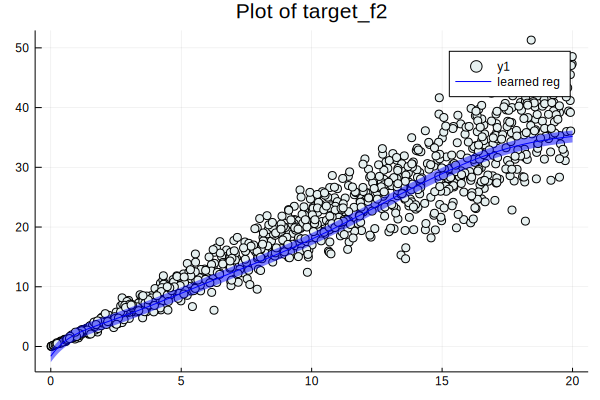

In [108]:
display(plot!(target, r, y, color="blue", label="learned reg", ribbon = 1))

In [109]:
target_f = target_f3
# n = 100
w1 = 0.01*rand(1,10)
w2 = 0.01*rand(10,1)
b1 = 0.01*rand(1,10)
b2 = 0.01*rand(1,1)
θ_init = (b1, w1, w2, b2)
θ_learned= train_nn_reg(target_f, θ_init; bs= 300, lr = 1e-5, iters=6000, σ_model = 1. )
x,y = sample_batch(target_f,1000)
target = plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f3")
# plot!(x, θ_learned[4], color=ColorGradient(:viridis),linecolor="green", ribbon=1.)
r = 0:0.01:20
r_array = r[:,:]
f(x) = neural_net(x, θ_learned)
y = f(transpose(r_array))

┌ Info: iteration 1, loss: 89014.11546311415
└ @ Main In[104]:7
┌ Info: iteration 600, loss: 15307.78963849109
└ @ Main In[104]:7
┌ Info: iteration 1200, loss: 7423.40156957028
└ @ Main In[104]:7
┌ Info: iteration 1800, loss: 2501.3134692414133
└ @ Main In[104]:7
┌ Info: iteration 2400, loss: 2613.907540279955
└ @ Main In[104]:7
┌ Info: iteration 3000, loss: 4811.308465202057
└ @ Main In[104]:7
┌ Info: iteration 3600, loss: 1687.6663155314138
└ @ Main In[104]:7
┌ Info: iteration 4200, loss: 4507.548397255338
└ @ Main In[104]:7
┌ Info: iteration 4800, loss: 2085.7436924202398
└ @ Main In[104]:7
┌ Info: iteration 5400, loss: 2339.145122610096
└ @ Main In[104]:7
┌ Info: iteration 6000, loss: 2215.7289355823154
└ @ Main In[104]:7


2001-element Array{Float64,1}:
 -0.6176218606198303  
 -0.5452558531462657  
 -0.473455281895272   
 -0.4022167084611885  
 -0.3315365871089906  
 -0.26141126860704755 
 -0.19183700402029213 
 -0.12280994846116577 
 -0.05432616479587793 
  0.013618372696265979
  0.08102777471260136 
  0.1479062333677934  
  0.21425801868728467 
  ⋮                   
 37.72602401536642    
 37.726168947580106   
 37.72631216327446    
 37.72645368419773    
 37.72659353181817    
 37.7267317273276     
 37.72686829164499    
 37.727003245419965   
 37.72713660903628    
 37.727268402615195   
 37.72739864601895    
 37.72752735885401    

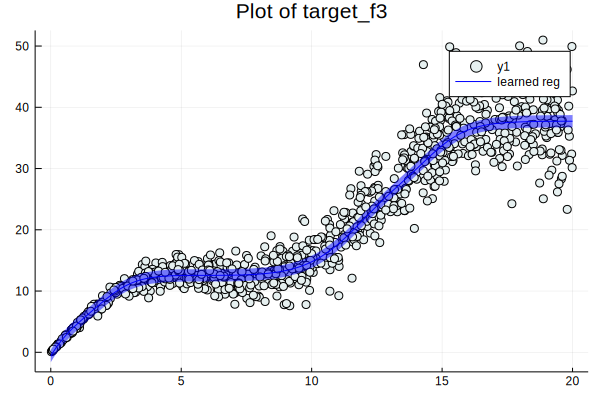

In [110]:
display(plot!(target, r, y, color="blue", label="learned reg", ribbon = 1))

## Non-linear Regression and Input-dependent Variance with a Neural Network

In the previous parts, we've gone from a gaussian model with mean given by linear combination

$$Y \sim \mathcal{N}(X^T \beta, \sigma^2)$$

to gaussian model with mean given by non-linear function of the data (neural network)

$$Y \sim \mathcal{N}(\texttt{neural\_net}(X,\theta), \sigma^2)$$

However, in all cases we have considered so far, we specify a fixed variance for our model distribution.
We know that two of our target datasets have heteroscedastic noise, meaning any fixed choice of variance will poorly model the data.

Now, we will use a neural network to learn both the mean and log-variance of our gaussian model.
$$
\begin{align*}
\mu, \log \sigma &= \text{neural\_net}(X,\theta)\\
Y &\sim \mathcal{N}(\mu, \exp(\log \sigma)^2)
\end{align*}
$$

Implement a fully-connected neural network (multi-layer perceptron) with one 10-dimensional hidden layer and a `tanh` nonlinearirty, and outputs both a vector for mean and $\log \sigma$. Test the output shape is as expected.

In [112]:
# Neural Network Function
function neural_net_w_var(x,θ)
  input = x
  hidden = tanh.(transpose(input)*θ[2] .+ θ[1]) #1x10
  output =  hidden*θ[3] .+ θ[4]
  return output[:,1], output[:,2]
end

# Random initial Parameters
w1 = 0.1*rand(1,10)
w2 = 0.1*rand(10,2)
b1 = 0.1*rand(1,10)
b2 = 0.1*rand(1,2)
θ = (b1, w1, w2, b2)

([0.0005460440454086779 0.07489327170113239 … 0.03332314862925125 0.0679432634539809], [0.033541310984259366 0.007473241864896041 … 0.05376001279219278 0.0947643733593811], [0.08534812384095497 0.048164178760272174; 0.08148546960368651 0.030760719312312213; … ; 0.03345488224328759 0.08495810392071064; 0.07243986557467307 0.022984032115080114], [0.06269648601156859 0.07386932168132597])

In [113]:
@testset "neural net mean and logsigma vector output" begin
  n = 100
  x,y = sample_batch(target_f1,n)
  μ, logσ = neural_net_w_var(x,θ)
  @test size(μ) == (n,)
  @test size(logσ) == (n,)
end

Test Summary:                              | Pass  Total
neural net mean and logsigma vector output |    2      2


Test.DefaultTestSet("neural net mean and logsigma vector output", Any[], 2, false)

Compute the negative log-likelihood for this model where the mean and $\log \sigma$ is given by the output of the neural network.

In [114]:
function nn_with_var_model_nll(θ,x,y)
  μ, logσ = neural_net_w_var(x,θ)
  return -1*sum(gaussian_log_likelihood.(μ, exp.(logσ), y))
end

nn_with_var_model_nll (generic function with 1 method)

Impelement a function `train_nn_w_var_reg` that accepts a target function and an initial estimate for $\theta$ and some
    hyperparameters for batch-size, learning rate, and number of iterations.
    Then, for each iteration:
* sample data from the target function
* compute gradients of negative log-likelihood with respect to $\theta$
* update the estimate of $\theta$ with gradient descent with specified learning rate

and, after all iterations, returns the final estimate of $\theta$.


In [116]:
function train_nn_w_var_reg(target_f, θ_init; bs= 100, lr = 1e-4, iters=10000)
  θ_curr = θ_init
  for i in 1:iters
    x,y = sample_batch(target_f,bs)
    loss = nn_with_var_model_nll(θ,x,y)
    if (i==1) || (i % (iters/10)==0) #just print every iters/10 iterations
      @info "iteration $i, loss: $loss" #log loss
    end
    grad_θ = gradient(θ ->  nn_with_var_model_nll(θ,x,y), θ_curr)#compute gradients
    new_theta1 =  θ_curr[1] - lr * grad_θ[1][1]
    new_theta2 =  θ_curr[2] - lr * grad_θ[1][2]
    new_theta3 =  θ_curr[3] - lr * grad_θ[1][3]
    new_theta4 =  θ_curr[4] - lr * grad_θ[1][4]
    θ_curr = (new_theta1, new_theta2, new_theta3, new_theta4)
  end
  return θ_curr
end

train_nn_w_var_reg (generic function with 1 method)

For each target function, start with an initialization of the network parameters, $\theta$,
    learn an estimate for $\theta_\text{learned}$ by gradient descent.
    Then plot a $n=1000$ sample of the dataset and the learned regression model with shaded uncertainty bounds corresponding to plus/minus one standard deviation given by the variance of the predictive distribution at each input location (output by the neural network).
    
Note: Learning the variance may be unstable during training, so we will
* Adjusting the hyperparameters like learning rate and batch size
* Train for more iterations
* Try a different random initialization, like sample random weights and bias matrices with lower variance..

In [117]:
target_f = target_f1
# n = 100
w1 = 0.01*rand(1,10)
w2 = 0.01*rand(10,2)
b1 = 0.01*rand(1,10)
b2 = 0.01*rand(1,2)
θ_init = (b1, w1, w2, b2)
θ_learned= train_nn_w_var_reg(target_f, θ_init; bs= 100, lr = 1e-4, iters=6000)
x,y = sample_batch(target_f,1000)
target = plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f1")
# plot!(x, θ_learned[4], color=ColorGradient(:viridis),linecolor="green", ribbon=1.)
r = 0:0.01:20
r_array = r[:,:]
f(x) = neural_net_w_var(x, θ_learned)
y, sig = f(transpose(r_array))

┌ Info: iteration 1, loss: 14139.212458365417
└ @ Main In[116]:7
┌ Info: iteration 600, loss: 13928.29118300709
└ @ Main In[116]:7
┌ Info: iteration 1200, loss: 12571.884568005093
└ @ Main In[116]:7
┌ Info: iteration 1800, loss: 12264.433999819283
└ @ Main In[116]:7
┌ Info: iteration 2400, loss: 10963.61922070498
└ @ Main In[116]:7
┌ Info: iteration 3000, loss: 12314.729729760247
└ @ Main In[116]:7
┌ Info: iteration 3600, loss: 13007.129779249452
└ @ Main In[116]:7
┌ Info: iteration 4200, loss: 12614.692370027877
└ @ Main In[116]:7
┌ Info: iteration 4800, loss: 12207.417605595376
└ @ Main In[116]:7
┌ Info: iteration 5400, loss: 13958.64649753533
└ @ Main In[116]:7
┌ Info: iteration 6000, loss: 13744.449762500095
└ @ Main In[116]:7


([-0.13207518677398067, -0.10627388162071005, -0.08062050844504398, -0.055112931576871915, -0.029749028870297067, -0.004526692019986012, 0.020556173139700373, 0.04550164635234344, 0.07031179267344356, 0.0949886622203131  …  29.389391103942753, 29.390144240813825, 29.39089361167265, 29.391639235328267, 29.392381130498578, 29.39311931581074, 29.393853809801577, 29.394584630917997, 29.395311797517333, 29.396035327867832], [-0.5911918967531538, -0.5978421164314556, -0.6043941319770623, -0.6108490409249416, -0.6172079328972249, -0.6234718894295224, -0.6296419838069021, -0.6357192809092522, -0.6417048370658307, -0.6475996999187421  …  1.6388346560904337, 1.6389180280587574, 1.6390009428512564, 1.639083402885206, 1.6391654105657496, 1.6392469682859518, 1.639328078426856, 1.639408743357536, 1.6394889654351514, 1.6395687470050029])

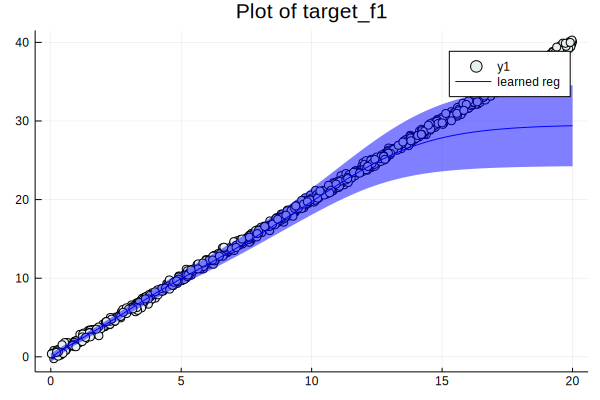

In [118]:
display(plot!(target, r, y, color="blue", label="learned reg", ribbon = exp.(sig)))

In [119]:
target_f = target_f2
# n = 100
w1 = 0.01*rand(1,10)
w2 = 0.01*rand(10,2)
b1 = 0.01*rand(1,10)
b2 = 0.01*rand(1,2)
θ_init = (b1, w1, w2, b2)
θ_learned= train_nn_w_var_reg(target_f, θ_init; bs= 200, lr = 1e-4, iters=9000)
x,y = sample_batch(target_f,1000)
target = plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f2")
# plot!(x, θ_learned[4], color=ColorGradient(:viridis),linecolor="green", ribbon=1.)
r = 0:0.01:20
r_array = r[:,:]
f(x) = neural_net_w_var(x, θ_learned)
y, sig = f(transpose(r_array))

┌ Info: iteration 1, loss: 24317.027671637956
└ @ Main In[116]:7
┌ Info: iteration 900, loss: 24436.02491583122
└ @ Main In[116]:7
┌ Info: iteration 1800, loss: 24001.57643822045
└ @ Main In[116]:7
┌ Info: iteration 2700, loss: 24503.2928306824
└ @ Main In[116]:7
┌ Info: iteration 3600, loss: 25846.221652583703
└ @ Main In[116]:7
┌ Info: iteration 4500, loss: 28253.204020174988
└ @ Main In[116]:7
┌ Info: iteration 5400, loss: 25727.545302889805
└ @ Main In[116]:7
┌ Info: iteration 6300, loss: 26558.69311812116
└ @ Main In[116]:7
┌ Info: iteration 7200, loss: 24554.287946452994
└ @ Main In[116]:7
┌ Info: iteration 8100, loss: 25952.76874201687
└ @ Main In[116]:7
┌ Info: iteration 9000, loss: 27214.72573364658
└ @ Main In[116]:7


([-0.11677759910781305, -0.08784881389203258, -0.05924163050920539, -0.030947641335286935, -0.0029586046964911183, 0.024733557146489726, 0.052136760053771436, 0.07925876009637944, 0.10610715567670459, 0.1326893896750856  …  35.78601523742125, 35.78673838331309, 35.78745704416097, 35.788171247544255, 35.788881020877795, 35.78958639141291, 35.79028738623821, 35.79098403228055, 35.791676356305885, 35.79236438492021], [-1.406328665440749, -1.410372372032982, -1.414209739073459, -1.41784492627679, -1.4212820124978665, -1.4245249968285085, -1.4275777997098524, -1.4304442640582513, -1.4331281564026463, -1.4356331680314431  …  1.8339803244371033, 1.8340206209643064, 1.8340606913038098, 1.8341005367557885, 1.8341401586130086, 1.8341795581608507, 1.834218736677367, 1.8342576954333047, 1.8342964356921545, 1.8343349587101878])

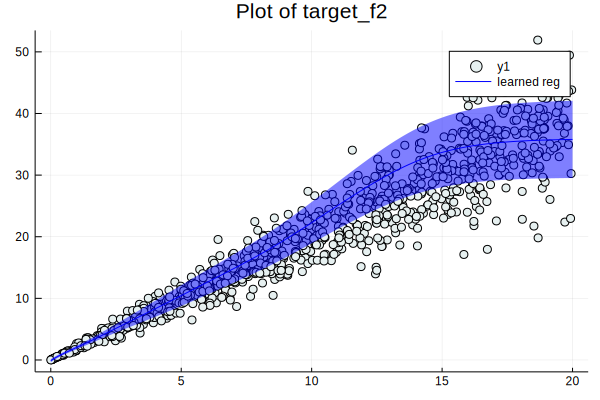

In [120]:
display(plot!(target, r, y, color="blue", label="learned reg", ribbon = exp.(sig)))

In [125]:
target_f = target_f3
# n = 100
w1 = 0.01*rand(1,10)
w2 = 0.01*rand(10,2)
b1 = 0.01*rand(1,10)
b2 = 0.01*rand(1,2)
θ_init = (b1, w1, w2, b2)
θ_learned= train_nn_w_var_reg(target_f, θ_init; bs= 300, lr = 1e-4, iters=9000)
x,y = sample_batch(target_f,1000)
target = plot(vec(x),y,seriestype=:scatter, seriescolor=ColorGradient(:dense), title = "Plot of target_f3")
# plot!(x, θ_learned[4], color=ColorGradient(:viridis),linecolor="green", ribbon=1.)
r = 0:0.01:20
r_array = r[:,:]
f(x) = neural_net_w_var(x, θ_learned)
y, sig = f(transpose(r_array))

┌ Info: iteration 1, loss: 43412.83576695319
└ @ Main In[116]:7
┌ Info: iteration 900, loss: 43194.12598200456
└ @ Main In[116]:7
┌ Info: iteration 1800, loss: 38724.73468230508
└ @ Main In[116]:7
┌ Info: iteration 2700, loss: 40857.59047290202
└ @ Main In[116]:7
┌ Info: iteration 3600, loss: 48911.49261566559
└ @ Main In[116]:7
┌ Info: iteration 4500, loss: 43434.31212125463
└ @ Main In[116]:7
┌ Info: iteration 5400, loss: 38584.78057381596
└ @ Main In[116]:7
┌ Info: iteration 6300, loss: 38424.86201962147
└ @ Main In[116]:7
┌ Info: iteration 7200, loss: 47810.435760403576
└ @ Main In[116]:7
┌ Info: iteration 8100, loss: 40695.8708464735
└ @ Main In[116]:7
┌ Info: iteration 9000, loss: 41256.770261667276
└ @ Main In[116]:7


([-0.0976991496703219, -0.03536916443678839, 0.026100340612631445, 0.08673069684395562, 0.1465432065419554, 0.20555911426514673, 0.26379957986418523, 0.32128565313719903, 0.3780382500912851, 0.4340781307756272  …  34.69672972213639, 34.69684787906077, 34.69696469757014, 34.697080192920914, 34.69719438019538, 34.69730727430368, 34.69741888998575, 34.697529241813264, 34.69763834419157, 34.69774621136155], [-0.9832452775637055, -0.9976078882978552, -1.0114329193312184, -1.0247338181736207, -1.0375237950544722, -1.049815818589467, -1.0616226122139558, -1.0729566513356126, -1.0838301611606678, -1.0942551151492008  …  1.859505804318097, 1.859511239565304, 1.8595166231499007, 1.8595219556106635, 1.859527237480469, 1.8595324692863677, 1.8595376515496298, 1.8595427847858357, 1.8595478695049223, 1.8595529062112472])

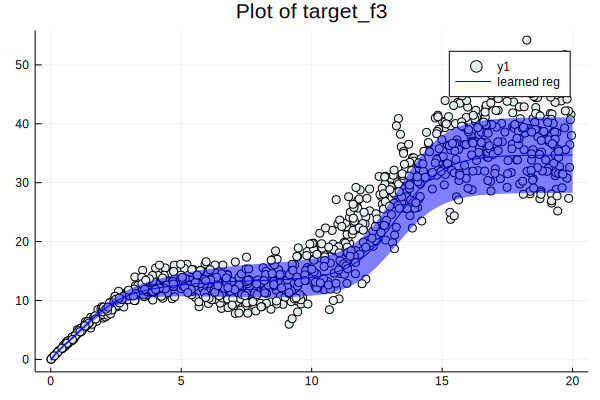

In [126]:
display(plot!(target, r, y, color="blue", label="learned reg", ribbon = exp.(sig)))